##**1. Import Library**

In [ ]:
!pip install squarify

In [ ]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import squarify
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import fisher_exact
import rpy2.robjects.numpy2ri
from rpy2.robjects.packages import importr
rpy2.robjects.numpy2ri.activate()
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##**2. Load Dataset**

In [ ]:
# load dataset from google drive storage
df = pd.read_csv('/content/drive/MyDrive/4.Data Science Course/Personal Project/Brazilian E-commerce Public Dataset/Dataset/df_clean.csv')
df

,order_id,customer_id,product_id,order_purchase_timestamp,date_year_month_day,date_year_month,order_status,customer_city,customer_state,product_category_name,payment_type,payment_installments,count_order,price,freight_value,payment_value,calculated_payment_value
0,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,595fac2a385ac33a80bd5114aec74eb8,2018-07-24 20:41:37,2018-07-24,2018-07,delivered,barreiras,BA,perfumaria,boleto,1.0,1.0,118.70,22.76,141.46,141.46
1,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,aa4383b373c6aca5d8797843e5594415,2018-08-08 08:38:49,2018-08-08,2018-08,delivered,vianopolis,GO,automotivo,credit_card,3.0,1.0,159.90,19.22,179.12,179.12
2,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,d0b61bfb1de832b15ba9d266ca96e5b0,2017-11-18 19:28:06,2017-11-18,2017-11,delivered,sao goncalo do amarante,RN,pet_shop,credit_card,1.0,1.0,45.00,27.20,72.20,72.20
3,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,65266b2da20d04dbe00c5c2d3bb7859e,2018-02-13 21:18:39,2018-02-13,2018-02,delivered,santo andre,SP,papelaria,credit_card,1.0,1.0,19.90,8.72,28.62,28.62
4,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,060cb19345d90064d1015407193c233d,2017-07-09 21:57:05,2017-07-09,2017-07,delivered,congonhinhas,PR,automotivo,credit_card,6.0,1.0,147.90,27.36,175.26,175.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91691,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,ac35486adb7b02598c182c2ff2e05254,2017-03-09 09:54:05,2017-03-09,2017-03,delivered,sao jose dos campos,SP,beleza_saude,credit_card,3.0,1.0,72.00,13.08,85.08,85.08
91692,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,f1d4ce8c6dd66c47bbaa8c6781c2a923,2018-02-06 12:58:58,2018-02-06,2018-02,delivered,praia grande,SP,bebes,credit_card,3.0,1.0,174.90,20.10,195.00,195.00
91693,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,b80910977a37536adeddd63663f916ad,2017-08-27 14:46:43,2017-08-27,2017-08,delivered,nova vicosa,BA,eletrodomesticos_2,credit_card,5.0,1.0,205.99,65.02,271.01,271.01
91694,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,d1c427060a0f73f6b889a5c7c61f2ac4,2018-01-08 21:28:27,2018-01-08,2018-01,delivered,japuiba,RJ,informatica_acessorios,credit_card,4.0,2.0,179.99,40.59,441.16,441.16


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91696 entries, 0 to 91695
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   order_id                  91696 non-null  object 
 1   customer_id               91696 non-null  object 
 2   product_id                91696 non-null  object 
 3   order_purchase_timestamp  91696 non-null  object 
 4   date_year_month_day       91696 non-null  object 
 5   date_year_month           91696 non-null  object 
 6   order_status              91696 non-null  object 
 7   customer_city             91696 non-null  object 
 8   customer_state            91696 non-null  object 
 9   product_category_name     91696 non-null  object 
 10  payment_type              91696 non-null  object 
 11  payment_installments      91696 non-null  float64
 12  count_order               91696 non-null  float64
 13  price                     91696 non-null  float64
 14  freigh

In [ ]:
# Mengubah tipe data ke datetime
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

# Menambahkan kolom baru untuk format tahun-bulan-hari dan tahun-bulan
df['date_year_month_day'] = df['order_purchase_timestamp'].dt.strftime('%Y-%m-%d')
df['date_year_month'] = df['order_purchase_timestamp'].dt.strftime('%Y-%m')

# Mengubah kolom date_year_month_day kembali ke format datetime
df['date_year_month_day'] = pd.to_datetime(df['date_year_month_day'])

# drop redundant column
df = df.drop(columns=['payment_value','order_purchase_timestamp'])

# Convert the column to integer
df['count_order'] = df['count_order'].astype('int64')
df['payment_installments'] = df['payment_installments'].astype('int64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91696 entries, 0 to 91695
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  91696 non-null  object        
 1   customer_id               91696 non-null  object        
 2   product_id                91696 non-null  object        
 3   date_year_month_day       91696 non-null  datetime64[ns]
 4   date_year_month           91696 non-null  object        
 5   order_status              91696 non-null  object        
 6   customer_city             91696 non-null  object        
 7   customer_state            91696 non-null  object        
 8   product_category_name     91696 non-null  object        
 9   payment_type              91696 non-null  object        
 10  payment_installments      91696 non-null  int64         
 11  count_order               91696 non-null  int64         
 12  price             

In [ ]:
df

,order_id,customer_id,product_id,date_year_month_day,date_year_month,order_status,customer_city,customer_state,product_category_name,payment_type,payment_installments,count_order,price,freight_value,calculated_payment_value
0,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,595fac2a385ac33a80bd5114aec74eb8,2018-07-24,2018-07,delivered,barreiras,BA,perfumaria,boleto,1,1,118.70,22.76,141.46
1,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,aa4383b373c6aca5d8797843e5594415,2018-08-08,2018-08,delivered,vianopolis,GO,automotivo,credit_card,3,1,159.90,19.22,179.12
2,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,d0b61bfb1de832b15ba9d266ca96e5b0,2017-11-18,2017-11,delivered,sao goncalo do amarante,RN,pet_shop,credit_card,1,1,45.00,27.20,72.20
3,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,65266b2da20d04dbe00c5c2d3bb7859e,2018-02-13,2018-02,delivered,santo andre,SP,papelaria,credit_card,1,1,19.90,8.72,28.62
4,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,060cb19345d90064d1015407193c233d,2017-07-09,2017-07,delivered,congonhinhas,PR,automotivo,credit_card,6,1,147.90,27.36,175.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91691,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,ac35486adb7b02598c182c2ff2e05254,2017-03-09,2017-03,delivered,sao jose dos campos,SP,beleza_saude,credit_card,3,1,72.00,13.08,85.08
91692,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,f1d4ce8c6dd66c47bbaa8c6781c2a923,2018-02-06,2018-02,delivered,praia grande,SP,bebes,credit_card,3,1,174.90,20.10,195.00
91693,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,b80910977a37536adeddd63663f916ad,2017-08-27,2017-08,delivered,nova vicosa,BA,eletrodomesticos_2,credit_card,5,1,205.99,65.02,271.01
91694,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,d1c427060a0f73f6b889a5c7c61f2ac4,2018-01-08,2018-01,delivered,japuiba,RJ,informatica_acessorios,credit_card,4,2,179.99,40.59,441.16


##**3. Exploratory Data Analysis (EDA)**

In [ ]:
# list the columns in the same data type
cat_var = [col for col in df.columns if (df[col].dtype=='O') if not col.endswith('_id')]
num_var = [col for col in df.columns if (df[col].dtype=='int64') | (df[col].dtype=='float64')]

In [ ]:
# check categorical variable
cat_var

['date_year_month',
 'order_status',
 'customer_city',
 'customer_state',
 'product_category_name',
 'payment_type']

In [ ]:
# check categorical variable
num_var

['payment_installments',
 'count_order',
 'price',
 'freight_value',
 'calculated_payment_value']

###**a. Statistical Summary**

In [ ]:
# check descriptive statistics of categorical variables
df[cat_var].describe().T

,count,unique,top,freq
date_year_month,91696,24,2017-11,6864
order_status,91696,3,delivered,90202
customer_city,91696,4039,sao paulo,14288
customer_state,91696,27,SP,38426
product_category_name,91696,74,beleza_saude,8354
payment_type,91696,4,credit_card,70278


In [ ]:
# check descriptive statistics of categorical variables
df[num_var].describe().T

,count,mean,std,min,25%,50%,75%,max
payment_installments,91696.0,2.904849,2.677278,0.00,1.0000,2.00,4.0000,24.00
count_order,91696.0,1.098085,0.453832,1.00,1.0000,1.00,1.0000,20.00
price,91696.0,126.849371,191.780550,0.85,42.0075,79.90,139.9900,6735.00
freight_value,91696.0,20.224174,15.836348,0.00,13.3700,16.39,21.2100,409.68
calculated_payment_value,91696.0,157.104247,217.531780,10.07,61.0100,103.13,172.9625,13664.08


###**b. Univariate Analysis**

####**Categorical Data**

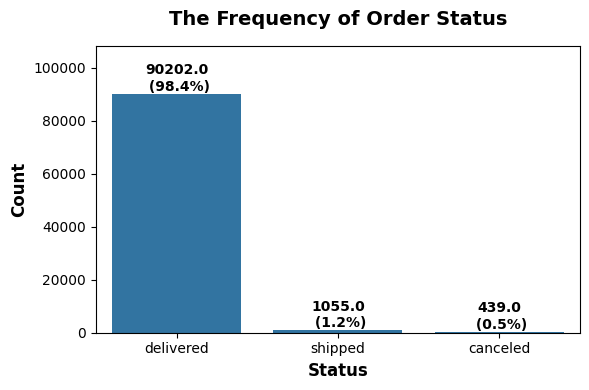

In [ ]:
# Visualize order_status with seaborn countplot
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x='order_status', order=df['order_status'].value_counts().index)

total = len(df['order_status'])  # Total number of order_status entries

# Label bars with count and percentage
for p in ax.patches:
    count = p.get_height()  # Get the count of each bar
    percentage = f'{100 * count / total:.1f}%'  # Calculate the percentage
    x = p.get_x() + p.get_width() / 2  # X position of text
    y = p.get_height()  # Y position of text for count
    ax.text(x, y, f'{count}\n ({percentage})', ha='center', weight='bold', va='bottom')  # Adjust va and y to position percentage below count

ax.set_ylim(0, max(ax.patches, key=lambda p: p.get_height()).get_height() * 1.2)  # Adjust ylim to make space for text
ax.set_title("The Frequency of Order Status", fontdict={'size': 14, 'weight': 'bold'}, pad=15)
ax.set_ylabel('Count', fontdict={'size': 12, 'weight': 'bold'})
ax.set_xlabel('Status', fontdict={'size': 12, 'weight': 'bold'})

plt.tight_layout()
plt.show()


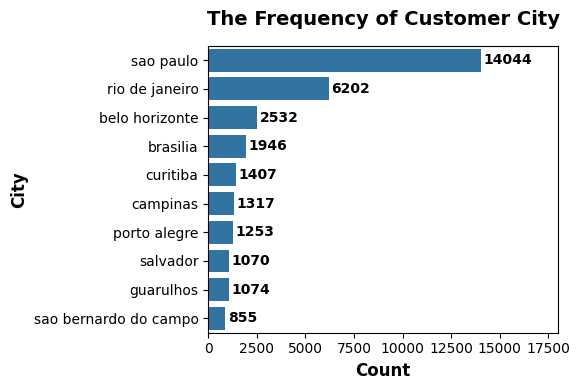

In [ ]:
# filtration of order status = delivered
filtered_df = df.query('order_status == "delivered"')

# visualize each variable (gender) with sns.countplot() operator
plt.figure(figsize=(6,4))
ax= sns.countplot(data=filtered_df, y='customer_city',
                  order= df['customer_city'].value_counts().head(10).index)
for bars in ax.containers:
    ax.bar_label(bars, label_type= 'edge',weight='bold', padding=2)
ax.set_xlim(0,18000)
ax.set_title("The Frequency of Customer City", fontdict={'size': 14, 'weight': 'bold'}, pad= 15)
ax.set_ylabel('City', fontdict={'size': 12, 'weight': 'bold'})
ax.set_xlabel('Count', fontdict={'size': 12, 'weight': 'bold'})
plt.tight_layout()
plt.show()

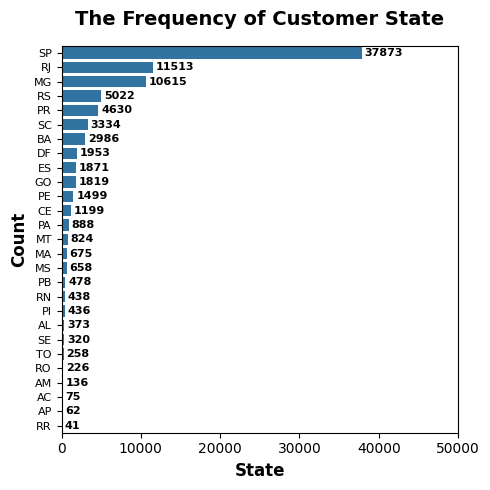

In [ ]:
# filtration of order status = delivered
filtered_df = df.query('order_status == "delivered"')

# visualize each variable (gender) with sns.countplot() operator
plt.figure(figsize=(5,5))
ax= sns.countplot(data=filtered_df, y='customer_state', order= df['customer_state'].value_counts().index)
for bars in ax.containers:
    ax.bar_label(bars, label_type= 'edge',weight='bold', padding=2, fontsize=8)
ax.set_xlim(0,50000)
ax.set_title("The Frequency of Customer State", fontdict={'size': 14, 'weight': 'bold'}, pad= 15)
ax.set_ylabel('Count', fontdict={'size': 12, 'weight': 'bold'})
ax.yaxis.set_ticklabels(df['customer_state'].value_counts().index,fontsize=8)
ax.set_xlabel('State', fontdict={'size': 12, 'weight': 'bold'})
plt.tight_layout()
plt.show()

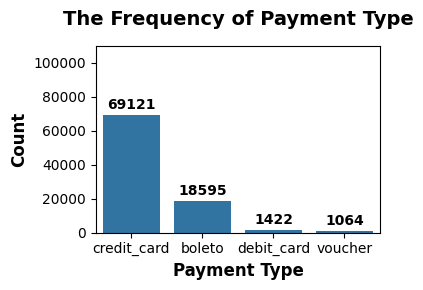

In [ ]:
# filtration of order status = delivered
filtered_df = df.query('order_status == "delivered"')

# visualize each variable (gender) with sns.countplot() operator
plt.figure(figsize=(4,3))
ax= sns.countplot(data=filtered_df, x='payment_type', order= df['payment_type'].value_counts().index)
for bars in ax.containers:
    ax.bar_label(bars, label_type= 'edge',weight='bold', padding=2)
ax.set_ylim(0,110000)
ax.set_title("The Frequency of Payment Type", fontdict={'size': 14, 'weight': 'bold'}, pad= 15)
ax.set_ylabel('Count', fontdict={'size': 12, 'weight': 'bold'})
ax.set_xlabel('Payment Type', fontdict={'size': 12, 'weight': 'bold'})
plt.tight_layout()
plt.show()

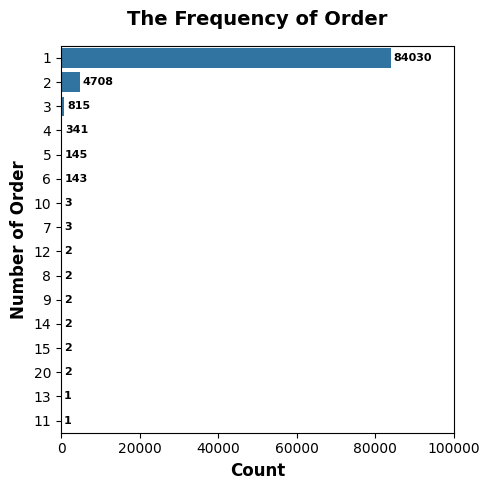

In [ ]:
# filtration of order status = delivered
filtered_df = df.query('order_status == "delivered"')

# visualize each variable (gender) with sns.countplot() operator
plt.figure(figsize=(5,5))
ax= sns.countplot(data=filtered_df, y='count_order', order= df['count_order'].value_counts().index)
for bars in ax.containers:
    ax.bar_label(bars, label_type= 'edge',weight='bold', padding=2, fontsize=8)
ax.set_xlim(0,100000)
ax.set_title("The Frequency of Order", fontdict={'size': 14, 'weight': 'bold'}, pad= 15)
ax.set_ylabel('Number of Order', fontdict={'size': 12, 'weight': 'bold'})
ax.set_xlabel('Count', fontdict={'size': 12, 'weight': 'bold'})
plt.tight_layout()
plt.show()

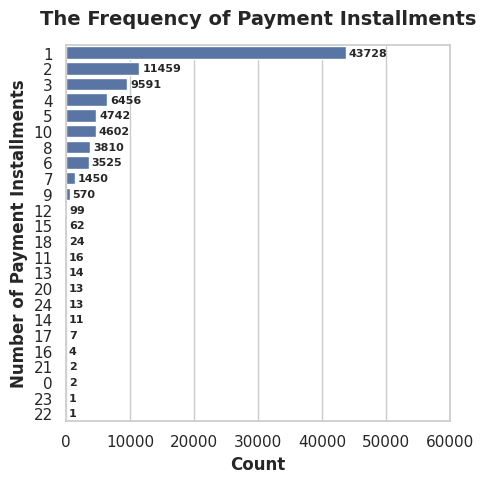

In [ ]:
# filtration of order status = delivered
filtered_df = df.query('order_status == "delivered"')

# visualize each variable (gender) with sns.countplot() operator
plt.figure(figsize=(5,5))
ax= sns.countplot(data=filtered_df, y='payment_installments', order= df['payment_installments'].value_counts().index)
for bars in ax.containers:
    ax.bar_label(bars, label_type= 'edge',weight='bold', padding=2, fontsize=8)
ax.set_xlim(0,60000)
ax.set_title("The Frequency of Payment Installments", fontdict={'size': 14, 'weight': 'bold'}, pad= 15)
ax.set_ylabel('Number of Payment Installments', fontdict={'size': 12, 'weight': 'bold'})
ax.set_xlabel('Count', fontdict={'size': 12, 'weight': 'bold'})
plt.tight_layout()
plt.show()

####**Numerical Data (Countinous)**

In [ ]:
# Define a function to visualize Boxplot and Histogram plots and display additional information
def visualize_boxplot_histogram(df, column):
    # Create a figure and define its size
    fig, axs = plt.subplots(2, 1, figsize=(8, 8))

    # Create a Boxplot
    sns.boxplot(x=column, data=df, ax=axs[0])
    axs[0].set_title(f'Boxplot of {column}')

    # Create a Histogram plot
    sns.histplot(data=df, x=column, kde=True, ax=axs[1])
    axs[1].set_title(f'Histogram of {column}')

    # Calculate the IQR and the upper and lower bounds
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Display additional information about the column
    print(f'\nInformation of {column}:')
    print(f'Any Outlier: {"Yes" if ((df[column] < lower_bound) | (df[column] > upper_bound)).sum() > 0 else "No"}')
    print(f'Distribution of Data: {"Normal" if df[column].skew() == 0 else "Positif Skewness" if df[column].skew() > 0 else "Negatif Skewness"}')
    print(f'Min: {df[column].min()}')
    print(f'Max: {df[column].max()}')
    print(f'Mean: {df[column].mean()}')
    print(f'Median: {df[column].median()}')

    # Show the plots
    plt.tight_layout()
    plt.show()


Information of price:
Any Outlier: Yes
Distribution of Data: Positif Skewness
Min: 0.85
Max: 6735.0
Mean: 126.5329200017738
Median: 79.9


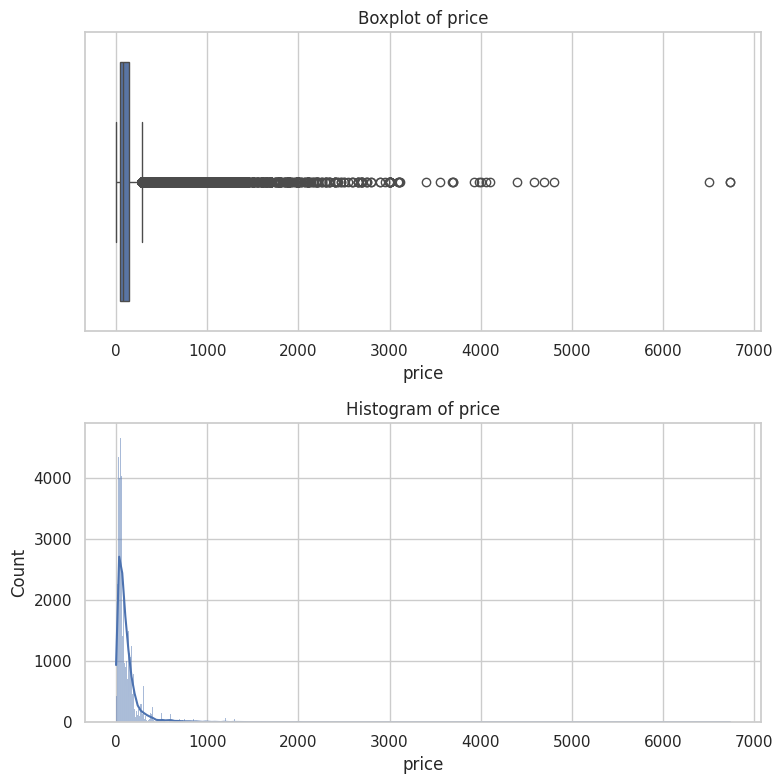

In [ ]:
# Call the function to visualize Boxplot and Histogram plots
visualize_boxplot_histogram(filtered_df, 'price')


Information of freight_value:
Any Outlier: Yes
Distribution of Data: Positif Skewness
Min: 0.0
Max: 409.68
Mean: 20.197788962550717
Median: 16.37


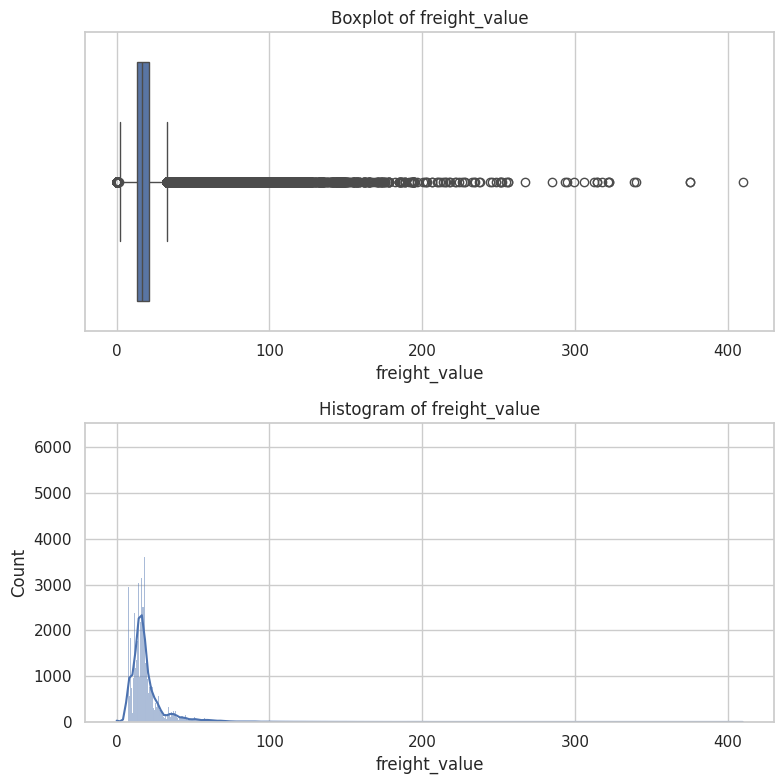

In [ ]:
# Call the function to visualize Boxplot and Histogram plots
visualize_boxplot_histogram(filtered_df, 'freight_value')


Information of calculated_payment_value:
Any Outlier: Yes
Distribution of Data: Positif Skewness
Min: 10.07
Max: 13664.08
Mean: 156.73454746014502
Median: 103.11


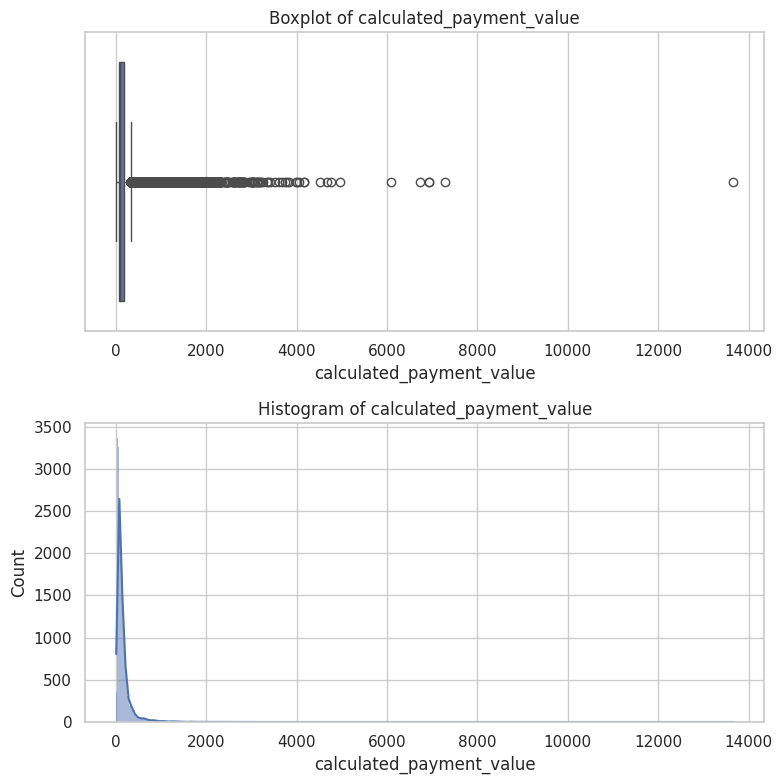

In [ ]:
# Call the function to visualize Boxplot and Histogram plots
visualize_boxplot_histogram(filtered_df, 'calculated_payment_value')

###**c. Deep-Dive Questions**

####**1. How many transactions/orders every month?**



In [ ]:
# filtration of order status = delivered
filtered_df = df.query('order_status == "delivered"')

# Groupby tanggal dan hitung jumlah transaksi
check_trsc = filtered_df.groupby(['date_year_month'])['count_order'].sum().reset_index(name='Total_Order')

# Membuat plot line menggunakan plotly.express
fig = px.line(check_trsc, x='date_year_month', y='Total_Order', title='Total Order Over Time')

fig.update_layout(
    xaxis_title='Date by Month',
    yaxis_title='Total Payment',
    yaxis=dict(range=[0, 7500]), # Mengatur batas y-axis
    xaxis=dict(tickangle=45), # Rotasi label x-axis
    title_x=0.5, # Menempatkan judul di tengah
    title_font=dict(size=20) # Membuat judul lebih menonjol dengan ukuran font
)

fig.show()


**Observasi:**
- berdasarkan line plot, terlihat bahwa total order tertinggi berada pada bulan November 2017. Sedangkan total order terendah berada di bulan Desember 2016.
- Lonjakan total order yang ekstrem yaitu pertama terjadi pasca bulan Desember 2016 sampai dengan bulan Maret 2017. Lonjakan kedua terjadi pasca bulan Oktober 2017 sampai dengan bulan November 2017.
- Secara umum, terjadi trend kenaikan total order dari bulan Oktober 2016 sampai dengan December 2017. Sedangkan dari awal Januari 2018 sampai dengan Agustus 2018, trend cenderung flat/landai.

####**2. How many payments made every month?**



In [ ]:
# filtration of order status = delivered
filtered_df = df.query('order_status == "delivered"')

# Groupby tanggal dan hitung jumlah transaksi
check_trsc = filtered_df.groupby('date_year_month')['calculated_payment_value'].sum().reset_index(name='Total_Payment')

# Membuat plot line menggunakan plotly.express
fig = px.line(check_trsc, x='date_year_month', y='Total_Payment', title='Total Payment Over Time')

fig.update_layout(
    xaxis_title='Date by Month',
    yaxis_title='Total Payment',
    yaxis=dict(range=[0, 1200000]),
    xaxis=dict(tickangle=45),
    title_x=0.5,
    title_font=dict(size=20) # Membuat judul lebih menonjol dengan ukuran font, tanpa spesifik bold
)

fig.show()


**Observasi:**
- berdasarkan line plot, terlihat bahwa total payment tertinggi berada pada bulan November 2017 dan April 2018. Sedangkan total payment terendah berada di bulan Desember 2016.
- Hal lain yang menarik yaitu pada bulan Maret 2018 - Mei 2018 mengalami masa puncak total payment yang stabil, dan menyamai total payment tertinggi di tahun 2017 (November 2017).
- Lonjakan total payment yang ekstrem yaitu pertama terjadi pasca bulan Desember 2016 sampai dengan bulan Maret 2017. Lonjakan kedua terjadi pasca bulan Oktober 2017 sampai dengan bulan November 2017.
- Secara umum, terjadi trend kenaikan total payment dari bulan Oktober 2016 sampai dengan December 2017. Sedangkan dari awal Januari 2018 sampai dengan Agustus 2018, trend cenderung flat/landai.

####**3. Top 10 customer IDs with the largest number of orders?**

In [ ]:
filtered_df = df.query('order_status == "delivered"')
check_trsc = filtered_df.groupby('customer_id')['count_order'].sum().reset_index(name='total_order')
check_trsc = check_trsc.sort_values('total_order', ascending=False)
check_trsc.reset_index().head(10)

,index,customer_id,total_order
0,67011,bd5d39761aa56689a265d95d8d32b8be,20
1,67250,be1b70680b9f9694d8c70f41fa3dc92b,20
2,5883,10de381f8a8d23fff822753305f71cae,15
3,61369,adb32467ecc74b53576d9d13a5a55891,15
4,59017,a7693fba2ff9583c78751f2b66ecab9d,14
5,75651,d5f2b3f597c7ccafbb5cac0bcc3d6024,14
6,44025,7d321bd4e8ba1caf74c4c1aabd9ae524,13
7,4706,0d93f21f3e8543a9d0d8ece01561f5b2,12
8,51353,91f92cfee46b79581b05aa974dd57ce5,12
9,76822,d95ca02ab50105ccce682bdf9ffdc3b4,11


**Observasi:**
- Customer ID = `bd5d39761aa56689a265d95d8d32b8be` bersama `be1b70680b9f9694d8c70f41fa3dc92b` menjadi customer dengan total order terbanyak/terbesar (20 order) diurutan pertama dari 10 teratas customer id dengan total order terbanyak.
- Customer ID = `d95ca02ab50105ccce682bdf9ffdc3b4` menjadi customer dengan total order terbanyak/terbesar diurutan terakhir dari 10 teratas customer id dengan total order terbanyak.

####**4. Top 10 customer IDs with the largest number of payments?**

In [ ]:
filtered_df = df.query('order_status == "delivered"')
check_trsc = filtered_df.groupby('customer_id')['calculated_payment_value'].sum().reset_index(name='Total_Payment')
check_trsc = check_trsc.sort_values('Total_Payment', ascending=False)
check_trsc.reset_index().head(10)

,index,customer_id,Total_Payment
0,7728,1617b1357756262bfa56ab541c47bc16,13664.08
1,83429,ec5b2ba62e574342386871631fafd3fc,7274.88
2,70359,c6e2731c5b391845f6800c97401a43a9,6929.31
3,86291,f48d464a0baaea338cb25f816991ab1f,6922.21
4,22500,3fd6777bbce08a352fddd04e4a7cc8f6,6726.66
5,1845,05455dfa7cd02f13d132aa7a6a9729c6,6081.54
6,78838,df55c14d1476a9a3467f131269c2477f,4950.34
7,12937,24bbf5fd2f2e1b359ee7de94defc4a15,4764.34
8,21726,3d979689f636322c62418b6346b1c6d2,4681.78
9,9494,1afc82cd60e303ef09b4ef9837c9505c,4513.32


**Observasi:**
- Customer ID = `1617b1357756262bfa56ab541c47bc16	` menjadi customer dengan total payment terbesar diurutan pertama dari 10 teratas customer id dengan total payment terbesar.
- Customer ID = `1afc82cd60e303ef09b4ef9837c9505c` menjadi customer dengan total order terbanyak/terbesar diurutan terakhir dari 10 teratas customer id dengan total payment terbesar.

####**5.Top 10 product names with the largest number of orders?**

In [ ]:
filtered_df = df.query('order_status == "delivered"')
check_trsc = filtered_df.groupby('product_category_name')['count_order'].sum().reset_index(name='total_order')
check_trsc = check_trsc.sort_values('total_order', ascending=False)
check_trsc.reset_index().head(10)

,index,product_category_name,total_order
0,13,cama_mesa_banho,8901
1,11,beleza_saude,8791
2,32,esporte_lazer,7821
3,54,moveis_decoracao,7009
4,44,informatica_acessorios,6945
5,73,utilidades_domesticas,6114
6,66,relogios_presentes,5326
7,70,telefonia,4087
8,40,ferramentas_jardim,3825
9,8,automotivo,3801


**Observasi:**
- Product Category Name = `cama_mesa_banho` menjadi produk dengan total order terbesar diurutan pertama dari 10 Product Category Name teratas dengan total order terbesar.
- Product Category Name = `automotivo` menjadi produk dengan total order terbesar diurutan terakhir dari 10 Product Category Name teratas dengan total order terbesar.

####**6.Top 10 product names with the largest number of payments?**

In [ ]:
filtered_df = df.query('order_status == "delivered"')
check_trsc = filtered_df.groupby('product_category_name')['calculated_payment_value'].sum().reset_index(name='total_payment')
check_trsc = check_trsc.sort_values('total_payment', ascending=False)
check_trsc.reset_index().head(10)

,index,product_category_name,total_payment
0,11,beleza_saude,1329491.67
1,66,relogios_presentes,1178883.16
2,32,esporte_lazer,1046721.89
3,13,cama_mesa_banho,1024465.08
4,44,informatica_acessorios,944184.08
5,54,moveis_decoracao,770901.67
6,73,utilidades_domesticas,693517.02
7,26,cool_stuff,655249.24
8,8,automotivo,615665.39
9,40,ferramentas_jardim,519831.97


**Observasi:**
- Product Category Name = `beleza_saude` menjadi produk dengan total payment terbesar diurutan pertama dari 10 Product Category Name teratas dengan total payment terbesar.
- Product Category Name = `ferramentas_jardim` menjadi produk dengan total payment terbesar diurutan terakhir dari 10 Product Category Name teratas dengan total payment terbesar.

####**7.Top 10 customer cities with the largest number of orders?**

In [ ]:
filtered_df = df.query('order_status == "delivered"')
check_trsc = filtered_df.groupby(['customer_city'])['count_order'].sum().reset_index(name='total_order')
check_trsc = check_trsc.sort_values('total_order', ascending=False)
check_trsc.reset_index().head(10)

,index,customer_city,total_order
0,3515,sao paulo,15516
1,3083,rio de janeiro,6895
2,443,belo horizonte,2779
3,546,brasilia,2119
4,1120,curitiba,1583
5,690,campinas,1464
6,2893,porto alegre,1406
7,3175,salvador,1175
8,1496,guarulhos,1171
9,3353,sao bernardo do campo,948


**Observasi:**
- `sao paulo` menjadi kota dari customer dengan total order terbesar diurutan pertama dari 10 Customer Cities teratas dengan total order terbesar.
- `sao bernardo do campo` menjadi kota dari customer dengan total order terbesar diurutan terakhir dari 10 Customer Cities teratas dengan total order terbesar.

####**8.Top 10 customer cities with the largest number of payment?**

In [ ]:
filtered_df = df.query('order_status == "delivered"')
check_trsc = filtered_df.groupby(['customer_city'])['calculated_payment_value'].sum().reset_index(name='total_payment')
check_trsc = check_trsc.sort_values('total_payment', ascending=False)
check_trsc.reset_index().head(10)

,index,customer_city,total_payment
0,3515,sao paulo,1917852.26
1,3083,rio de janeiro,1036611.66
2,443,belo horizonte,378071.36
3,546,brasilia,313797.91
4,1120,curitiba,222267.06
5,2893,porto alegre,195636.79
6,690,campinas,191867.97
7,3175,salvador,186155.64
8,1496,guarulhos,145311.72
9,2410,niteroi,116115.21


**Observasi:**
- `sao paulo` menjadi kota dari customer dengan total payment terbesar diurutan pertama dari 10 Customer Cities teratas dengan total payment terbesar.
- `niteroi` menjadi kota dari customer dengan total payment terbesar diurutan terakhir dari 10 Customer Cities teratas dengan total payment terbesar.

####**9.Top 10 customer states with the largest number of payments using credit cards?**

In [ ]:
filtered_df = df.query('order_status == "delivered"')
check_trsc = filtered_df.groupby(['customer_state','payment_type'])['calculated_payment_value'].sum().reset_index(name='total_payment')
check_trsc = check_trsc.query('payment_type == "credit_card"')
check_trsc = check_trsc.sort_values('total_payment', ascending=False)
check_trsc.reset_index().head(10)

,index,customer_state,payment_type,total_payment
0,97,SP,credit_card,4167223.36
1,71,RJ,credit_card,1549117.85
2,39,MG,credit_card,1329905.63
3,85,RS,credit_card,596881.31
4,67,PR,credit_card,562221.45
5,15,BA,credit_card,443134.17
6,89,SC,credit_card,432056.77
7,23,DF,credit_card,262512.44
8,59,PE,credit_card,239726.42
9,31,GO,credit_card,233036.03


**Observasi:**
- Kode State = `SP` menjadi negara bagian dengan total payment terbesar diurutan pertama dari 10 Customer States teratas dengan total payment terbesar yang menggunakan Credit Card.
- Kode State = `GO` menjadi kota dari customer dengan total payment terbesar diurutan terakhir dari 10 Customer States teratas dengan total payment terbesar yang menggunakan Credit Card.

####**10.Top 10 customer states with the largest number of payments using boleto?**

In [ ]:
filtered_df = df.query('order_status == "delivered"')
check_trsc = filtered_df.groupby(['customer_state','payment_type'])['calculated_payment_value'].sum().reset_index(name='total_payment')
check_trsc = check_trsc.query('payment_type == "boleto"')
check_trsc = check_trsc.sort_values('total_payment', ascending=False)
check_trsc.reset_index().head(10)

,index,customer_state,payment_type,total_payment
0,96,SP,boleto,989050.82
1,38,MG,boleto,316583.47
2,70,RJ,boleto,296465.55
3,84,RS,boleto,174706.65
4,66,PR,boleto,145401.74
5,88,SC,boleto,106866.67
6,14,BA,boleto,86573.05
7,30,GO,boleto,62297.51
8,26,ES,boleto,61707.86
9,22,DF,boleto,46164.77


**Observasi:**
- Kode State = `SP` menjadi negara bagian dengan total payment terbesar diurutan pertama dari 10 Customer States teratas dengan total payment terbesar yang menggunakan Boleto.
- Kode State = `DF` menjadi kota dari customer dengan total payment terbesar diurutan terakhir dari 10 Customer States teratas dengan total payment terbesar yang menggunakan Boleto.

####**11.Top 10 customer states with the largest number of payments using debit card?**

In [ ]:
filtered_df = df.query('order_status == "delivered"')
check_trsc = filtered_df.groupby(['customer_state','payment_type'])['calculated_payment_value'].sum().reset_index(name='total_payment')
check_trsc = check_trsc.query('payment_type == "debit_card"')
check_trsc = check_trsc.sort_values('total_payment', ascending=False)
check_trsc.reset_index().head(10)

,index,customer_state,payment_type,total_payment
0,98,SP,debit_card,79183.96
1,72,RJ,debit_card,25112.66
2,40,MG,debit_card,20039.04
3,86,RS,debit_card,11531.64
4,68,PR,debit_card,10144.98
5,90,SC,debit_card,7449.32
6,16,BA,debit_card,6673.11
7,56,PB,debit_card,5268.47
8,28,ES,debit_card,4550.99
9,32,GO,debit_card,3163.51


**Observasi:**
- Kode State = `SP` menjadi negara bagian dengan total payment terbesar diurutan pertama dari 10 Customer States teratas dengan total payment terbesar yang menggunakan Debit Card.
- Kode State = `GO` menjadi kota dari customer dengan total payment terbesar diurutan terakhir dari 10 Customer States teratas dengan total payment terbesar yang menggunakan Debit Card.

##**4. RFM Analysis**

###**a. Calculation of Recency, Frequency, & Monetary Value**

In [ ]:
# filtration of order status = delivered
filtered_df = df.query('order_status == "delivered"')

In [ ]:
# Specify the analysis date using the last date in the dataset
analysis_date = filtered_df["date_year_month_day"].max()

# Calculating Recency, Frequency, dan Monetary
df_rfm = filtered_df.groupby("customer_id").agg({
    "date_year_month_day": lambda x: (analysis_date - x.max()).days,
    "count_order": "sum",
    "calculated_payment_value": "sum"
}).reset_index()

# Name the columns according to RFM
df_rfm.columns = ["customer_id", "recency", "frequency", "monetary"]

# Showing RFM Results
df_rfm.head()

,customer_id,recency,frequency,monetary
0,00012a2ce6f8dcda20d059ce98491703,288,1,114.74
1,000161a058600d5901f007fab4c27140,409,1,67.41
2,0001fd6190edaaf884bcaf3d49edf079,547,1,195.42
3,0002414f95344307404f0ace7a26f1d5,378,1,179.35
4,000379cdec625522490c315e70c7a9fb,149,1,107.01


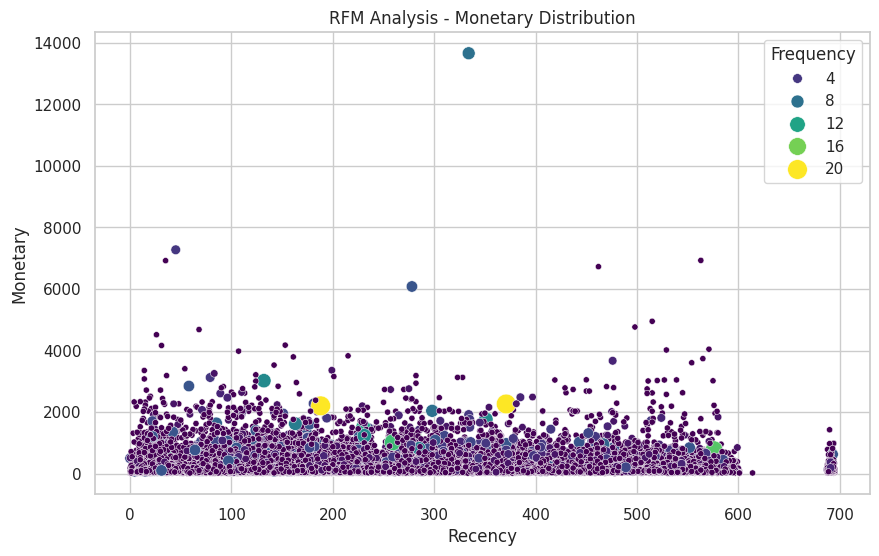

In [ ]:
# Sebaran data RFM
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.scatterplot(data=df_rfm,
                x=df_rfm["recency"],
                y=df_rfm["monetary"],
                size="frequency",
                sizes=(20, 200),
                hue="frequency",
                palette="viridis")

plt.title("RFM Analysis - Monetary Distribution")
plt.xlabel("Recency")
plt.ylabel("Monetary")
plt.legend(title="Frequency")

###**b. Create RFM Score from IQR**

In [ ]:
df_rfm.describe()

,recency,frequency,monetary
count,90199.000000,90199.000000,90199.000000
mean,238.876961,1.098338,156.739760
std,152.661957,0.453835,216.376148
min,0.000000,1.000000,10.070000
25%,115.000000,1.000000,61.000000
50%,219.000000,1.000000,103.110000
75%,348.000000,1.000000,172.660000
max,695.000000,20.000000,13664.080000


In [ ]:
def calculate_rfm_score(df, recency_col, frequency_col, monetary_col):
    # Step 1: Calculate quantiles
    quantiles = df.quantile(q=[0.25, 0.5, 0.75])
    quantiles = quantiles.to_dict()

    # Step 2: Define binning functions
    def r_score(x, p, d):
        if x <= d[p][0.25]:
            return 4
        elif x <= d[p][0.5]:
            return 3
        elif x <= d[p][0.75]:
            return 2
        else:
            return 1

    def fm_score(x, p, d):
        if x <= d[p][0.25]:
            return 1
        elif x <= d[p][0.5]:
            return 2
        elif x <= d[p][0.75]:
            return 3
        else:
            return 4

    # Step 3: Apply binning functions
    df['r_score'] = df[recency_col].apply(r_score, args=('recency', quantiles,))
    df['f_score'] = df[frequency_col].apply(fm_score, args=('frequency', quantiles,))
    df['m_score'] = df[monetary_col].apply(fm_score, args=('monetary', quantiles,))

    # Step 4: Calculate RFM Score
    df['rfm_Score'] = df['r_score'].astype(str) + df['f_score'].astype(str) + df['m_score'].astype(str)

    return df


In [ ]:
# Apply the function to your dataframe
df_rfm = calculate_rfm_score(df_rfm, 'recency', 'frequency', 'monetary')

# Check the result
df_rfm[['customer_id', 'recency', 'frequency', 'monetary', 'r_score', 'f_score', 'm_score', 'rfm_Score']].head()

,customer_id,recency,frequency,monetary,r_score,f_score,m_score,rfm_Score
0,00012a2ce6f8dcda20d059ce98491703,288,1,114.74,2,1,3,213
1,000161a058600d5901f007fab4c27140,409,1,67.41,1,1,2,112
2,0001fd6190edaaf884bcaf3d49edf079,547,1,195.42,1,1,4,114
3,0002414f95344307404f0ace7a26f1d5,378,1,179.35,1,1,4,114
4,000379cdec625522490c315e70c7a9fb,149,1,107.01,3,1,3,313


###**c. Create Customer Segmentation & Marketing Strategy**

In [ ]:
df_rfm[df_rfm['m_score']==4]

,customer_id,recency,frequency,monetary,r_score,f_score,m_score,rfm_Score
2,0001fd6190edaaf884bcaf3d49edf079,547,1,195.42,1,1,4,114
3,0002414f95344307404f0ace7a26f1d5,378,1,179.35,1,1,4,114
9,000598caf2ef4117407665ac33275130,18,1,1255.71,4,1,4,414
12,00066ccbe787a588c52bd5ff404590e3,204,4,270.00,3,4,4,344
14,0009a69b72033b2d0ec8c69fc70ef768,488,1,173.60,1,1,4,114
...,...,...,...,...,...,...,...,...
90158,ffdf82f47307e5b56f341a499bd268c6,123,1,175.50,3,1,4,314
90160,ffe0aaaac429db7837e943b83ee6c385,426,1,227.27,1,1,4,114
90164,ffe509f377a33554f5a677dcd83e669e,245,1,211.82,2,1,4,214
90181,fff25ab9d3c9ba6ad8119576f285a3d9,482,1,220.71,1,1,4,114


In [ ]:
# Define rfm_level function
def assign_rfm_segment(rfm_score):
    # Champions: Skor tinggi di semua kategori
    if rfm_score in ['444','443','433','434','343','344','334']:
        return 'Champions'
    # Loyal: Frekuensi tinggi, recency dan monetary bisa bervariasi
    elif rfm_score in ['432','333','324','244','243','234','233','224']:
        return 'Loyal Customers'
    # Potential Loyalists: Skor baik di recency atau frequency
    elif rfm_score in ['442','441','442','431','432','422','422','421','342','341',
                       '332','331','321','342','322','322','322','242','242','241',
                       '232','231','222','222']:
        return 'Potential Loyalists'
    # New Customers: Baru belanja (recency tinggi), tetapi frequency dan monetary lebih rendah
    elif rfm_score in ['412','411','322','321','312','311','211']:
        return 'New Customers'
    # Promising: Skor moderat di semua kategori
    elif rfm_score in ['424','423','422','422','421','414','413','412','324','323',
                       '312','313','314','214','213','212']:
        return 'Promising'
    # Need Attention: Menunjukkan penurunan di beberapa kategori
    elif rfm_score in ['424','423','332','323','232','223','224','223']:
        return 'Need Attention'
    # About To Sleep: Skor rendah di recency, moderat di lainnya
    elif rfm_score in ['221','221','212','221','212']:
        return 'About To Sleep'
    # Cannot Lose Them: Historis berharga tapi berisiko hilang
    elif rfm_score in ['144','143','133','213','214','114','113','112']:
        return 'Cannot Lose Them'
    # At Risk: Historis berharga, sekarang jarang berbelanja atau belanja sedikit
    elif rfm_score in ['244','243','234','233','242','242','232','232','224','223',
                       '224','223','142','142','134','132','132','124','123','122',
                       '124','123']:
        return 'At Risk'
    # Hibernating: Jarang berbelanja, pengeluaran rendah
    elif rfm_score in ['222','222','221','231','241','222','222','222','222',
                       '122','122','122','212','211']:
        return 'Hibernating'
    # Lost Customers: Sudah lama tidak berbelanja
    elif rfm_score in ['111','112','121','121','131','141']:
        return 'Lost Customers'
    else:
        return 'Other'


In [ ]:
# Define rfm_level function
def assign_rfm_marketing_strats(customer_segmentation):
    if customer_segmentation == 'Champions':
        return 'Reward them'
    elif customer_segmentation == 'Loyal Customers':
        return 'Upsell higher value products'
    elif customer_segmentation == 'Potential Loyalists':
        return 'Offer membership/loyalty program'
    elif customer_segmentation == 'New Customers':
        return 'Provide on-boarding support'
    elif customer_segmentation == 'Promising':
        return 'Offer discounts, gifts and free trials'
    elif customer_segmentation == 'Need Attention':
        return 'Make limited-time offers'
    elif customer_segmentation == 'About To Sleep':
        return 'Share useful information'
    elif customer_segmentation == 'Cannot Lose Them':
        return 'Get them back with renewals or newer products launches.'
    elif customer_segmentation == 'At Risk':
        return 'Send personalized emails to reconnect with special offers'
    elif customer_segmentation == 'Hibernating':
        return 'Create brand value again'
    elif customer_segmentation == 'Lost Customers':
        return 'Try to reactivate them with personalized campaigns. Do not overspend on this segment.'
    else:
        return 'Other'


In [ ]:
# Apply the function to your dataframe
df_rfm['customer_segmentation'] = df_rfm['rfm_Score'].apply(assign_rfm_segment)

In [ ]:
# Apply the function to your dataframe
df_rfm['marketing_strategy'] = df_rfm['customer_segmentation'].apply(assign_rfm_marketing_strats)

In [ ]:
# Check Dataframe
df_rfm.head()

,customer_id,recency,frequency,monetary,r_score,f_score,m_score,rfm_Score,customer_segmentation,marketing_strategy
0,00012a2ce6f8dcda20d059ce98491703,288,1,114.74,2,1,3,213,Promising,"Offer discounts, gifts and free trials"
1,000161a058600d5901f007fab4c27140,409,1,67.41,1,1,2,112,Cannot Lose Them,Get them back with renewals or newer products ...
2,0001fd6190edaaf884bcaf3d49edf079,547,1,195.42,1,1,4,114,Cannot Lose Them,Get them back with renewals or newer products ...
3,0002414f95344307404f0ace7a26f1d5,378,1,179.35,1,1,4,114,Cannot Lose Them,Get them back with renewals or newer products ...
4,000379cdec625522490c315e70c7a9fb,149,1,107.01,3,1,3,313,Promising,"Offer discounts, gifts and free trials"


###**d. Visualization of Customer Segmentation**

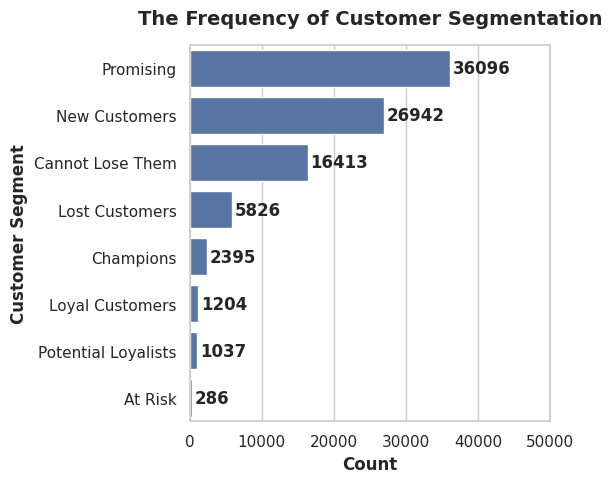

In [ ]:
# visualize each variable (gender) with sns.countplot() operator
plt.figure(figsize=(6,5))
ax= sns.countplot(data=df_rfm, y='customer_segmentation', order=df_rfm['customer_segmentation'].value_counts().index)
for bars in ax.containers:
    ax.bar_label(bars, label_type= 'edge',weight='bold', padding=2)
ax.set_xlim(0,50000)
ax.set_title("The Frequency of Customer Segmentation", fontdict={'size': 14, 'weight': 'bold'}, pad= 15)
ax.set_ylabel('Customer Segment', fontdict={'size': 12, 'weight': 'bold'})
ax.set_xlabel('Count', fontdict={'size': 12, 'weight': 'bold'})
plt.tight_layout()
plt.show()

In [ ]:
# Hitung frekuensi setiap segmen
segment_counts = df_rfm['customer_segmentation'].value_counts()
# Hitung persentase setiap segmen
segment_percentages = round((segment_counts / segment_counts.sum()) * 100, 2)

# Siapkan data untuk plot
labels = segment_counts.index
sizes = segment_counts.values
parents = [""] * len(labels)  # Tidak ada parent karena ini adalah level teratas

# Membuat label yang mencakup count dan persentase
custom_data = [f"{label}<br>{count} ({percentage}%)" for label, count, percentage in zip(labels, sizes, segment_percentages)]

# Membuat treemap
fig = go.Figure(go.Treemap(
    labels=labels,
    parents=parents,
    values=sizes,
    textinfo="label+value+percent root",
    customdata=custom_data,
    hovertemplate='%{customdata}<extra></extra>',  # Custom hover text
    textfont=dict(color='white')
))

fig.update_layout(
    title="The Frequency of Customer Segmentation",
    title_x=0.5, # Menempatkan judul di tengah
    margin=dict(t=50, l=25, r=25, b=25)
)

fig.show()

##**5. Conclusion**

**Berdasarkan Hasil Analisis RFM, terbentuk segment kustomer berikut:**

- **Promising (Menjanjikan):** Ini adalah segmen terbesar dengan 36,096 pelanggan. Ini menunjukkan bahwa banyak pelanggan memiliki potensi untuk dikembangkan menjadi pelanggan yang lebih setia atau lebih menguntungkan. Strategi pemasaran dapat difokuskan pada pertumbuhan hubungan ini.

- **New Customers (Pelanggan Baru):** Segmen kedua terbesar adalah pelanggan baru dengan 26,942 pelanggan. Mereka mungkin belum cukup waktu untuk menunjukkan perilaku pembelian yang sering atau menguntungkan, tetapi penting untuk menjaga agar pelanggan baru ini terlibat dengan merek untuk mendorong kesetiaan.

- **Cannot Lose Them (Tidak Boleh Kehilangan Mereka):** Dengan 16,413 pelanggan, segmen ini mungkin mewakili pelanggan yang telah bertransaksi cukup sering dan/atau baru-baru ini tetapi mungkin belum menghabiskan banyak uang. Mereka bisa berada dalam posisi yang berisiko pindah ke pesaing jika tidak dijaga dengan baik.

- **Lost Customers (Pelanggan yang Hilang):** Ada 5,826 pelanggan yang dianggap telah hilang atau churn. Mereka mungkin telah bertransaksi di masa lalu tetapi sudah lama tidak aktif. Upaya win-back atau re-engagement bisa diupayakan untuk segmen ini.

- **Champions (Juara):** Segmen ini memiliki 2,395 pelanggan yang mungkin adalah pelanggan paling setia dan menguntungkan. Mereka sering bertransaksi, baru-baru ini bertransaksi, dan mungkin menghabiskan banyak uang. Mereka harus dipertahankan dengan program loyalitas dan upsale produk atau layanan premium.

- **Loyal Customers (Pelanggan Setia):** Terdapat 1,204 pelanggan dalam segmen ini yang mungkin secara konsisten melakukan pembelian. Mereka memiliki kesetiaan terhadap brand dan bisa menjadi influencer brand jika dihargai dan diakui dengan baik.

- **Potential Loyalists (Potensial Setia):** Dengan 1,037 pelanggan, segmen ini mungkin merupakan pelanggan yang belum lama ini mulai bertransaksi lebih sering. Mereka memiliki potensi untuk menjadi pelanggan yang lebih setia dan harus ditargetkan dengan penawaran personalisasi untuk meningkatkan frekuensi pembelian.

- **At Risk (Berisiko):** Ini adalah segmen terkecil dengan hanya 286 pelanggan. Mereka mungkin dulunya adalah pelanggan yang lebih aktif tetapi belakangan ini jarang bertransaksi. Segmen ini memerlukan perhatian segera untuk mencegah mereka menjadi pelanggan yang hilang.

##**6. Save Dataset**

In [ ]:
# save RFM Dataset
df_rfm.to_csv('/content/drive/MyDrive/4.Data Science Course/Personal Project/Brazilian E-commerce Public Dataset/df_rfm_clean.csv', index=False)